# House Price Prediction using Linear regression

In [628]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [629]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Data Cleaning

In [630]:
# Dropping unnecessary features
df1=df.drop(['availability','society','balcony'],axis=1)
df1.head(3)

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00


In [631]:
#Exploring the size column
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [632]:
def get_bhk(x):
    try:
       return int(x.split(' ')[0])
    except:
        return None
df1['bhk']=df1['size'].apply(get_bhk)
df2=df1.drop('size',axis=1)
df2.head()

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3.0
4,Super built-up Area,Kothanur,1200,2.0,51.00,2.0


In [633]:
df2.isnull().sum()

area_type      0
location       1
total_sqft     0
bath          73
price          0
bhk           16
dtype: int64

In [634]:
#Filling bhk Nan values
df2['bhk'].fillna(df2['bhk'].median(),inplace=True)

C:\Users\vighn\AppData\Local\Temp\ipykernel_16296\436067056.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['bhk'].fillna(df2['bhk'].median(),inplace=True)


In [635]:
df2['bhk'].isnull().sum()

0

In [636]:
#Exploring location feature
df2['location'].nunique()

1305

In [637]:
#Dimensionality Reduction
df2['location']=df['location'].apply(lambda x:x.strip() if pd.notnull(x) else None)

In [638]:
location_stats = df2['location'].value_counts()
location_to_keep=location_stats[location_stats>10].index

In [639]:
df2['location']=df2['location'].apply(lambda x: x if x in location_to_keep else 'others')

In [640]:
df2['location'].nunique()

242

In [641]:
#Exploring Bath feature
df2['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [642]:
#Filling Nan values of bath
df2['bath'].fillna(df2['bhk'],inplace=True)

C:\Users\vighn\AppData\Local\Temp\ipykernel_16296\2988039422.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['bath'].fillna(df2['bhk'],inplace=True)


In [643]:
df2.isnull().sum()

area_type     0
location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [644]:
#Exploring total_sqft Feature
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [645]:
#cleaning the values which is different like:'1133 - 1384' or 2345 Sq.meter
def convert_sqft(x):
    try:
        if '-' in x:
            nums=x.split('-')
            return (float(nums[0])+float(nums[1]))/2
        elif 'Sq. Meter' in x:
            return float(x.split('Sq.')[0].strip()) * 10.764
        else:
            return float(x)
    except:
        return None

In [646]:
df2['total_sqft'] = df2['total_sqft'].astype(str).apply(convert_sqft)

In [647]:
df2['total_sqft'].isnull().sum()

29

In [648]:
df3=df2[df2['total_sqft'].notnull()]

In [649]:
df3.isnull().sum()

area_type     0
location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

## Feature Engineering

In [650]:
df3.head(3)

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3.0


In [651]:
df4=df3.copy()

In [652]:
df4['total_sqft']=pd.to_numeric(df4['total_sqft'],errors='coerce')

In [653]:
df4['price_per_sqft'] = (df4['price'] * 100000) / df4['total_sqft']

In [654]:
df4.isna().sum()

area_type         0
location          0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

## Removing Outliers

In [655]:
df4['bhk'].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., 27., 10., 19.,
       16., 43., 14., 12., 13., 18.])

In [656]:
df4[df4['bhk']>20]

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
1718,Super built-up Area,others,8000.0,27.0,230.0,27.0,2875.0
4684,Plot Area,Munnekollal,2400.0,40.0,660.0,43.0,27500.0


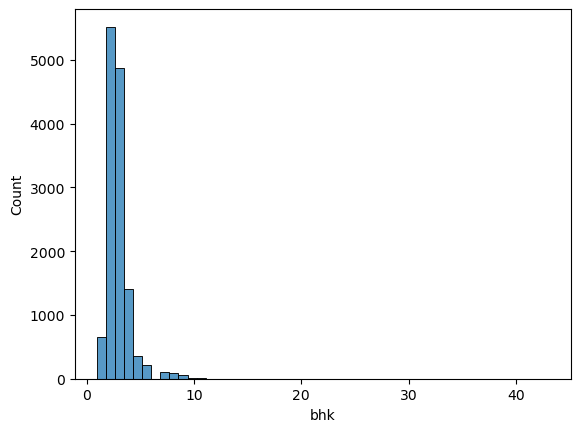

In [657]:
sns.histplot(df4['bhk'],bins=50);

In [658]:
df5=df4[df4['bhk']<20]

In [659]:
df6=df5[df5['bath']<df5['bhk']+2]

<Axes: xlabel='price', ylabel='Count'>

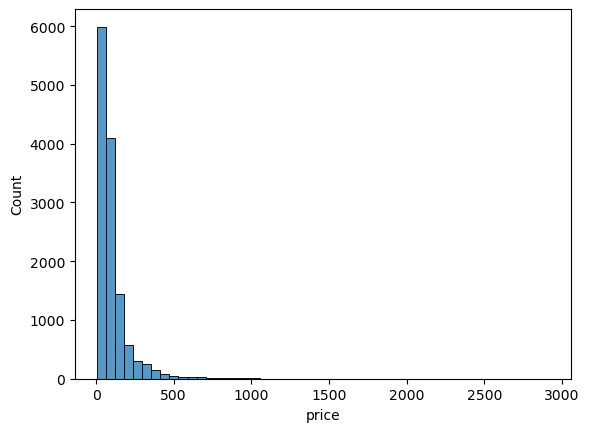

In [660]:
sns.histplot(df6['price'],bins=50)

In [661]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(11342, 7)

In [662]:
df7[(df7['price_per_sqft']<1000) | (df7['price_per_sqft']>10000)]

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491
2,Super built-up Area,1st Block Jayanagar,1200.0,6.0,125.0,6.0,10416.666667
3,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333
5,Plot Area,1st Block Jayanagar,700.0,4.0,104.0,8.0,14857.142857
...,...,...,...,...,...,...,...
11331,Built-up Area,others,1140.0,1.0,185.0,2.0,16228.070175
11333,Plot Area,others,1400.0,7.0,218.0,7.0,15571.428571
11335,Plot Area,others,1200.0,5.0,130.0,6.0,10833.333333
11340,Plot Area,others,1200.0,5.0,325.0,4.0,27083.333333


In [663]:
df8=df7[(df7['price_per_sqft']>1000) & (df7['price_per_sqft']<10000)]

<Axes: xlabel='price_per_sqft', ylabel='Count'>

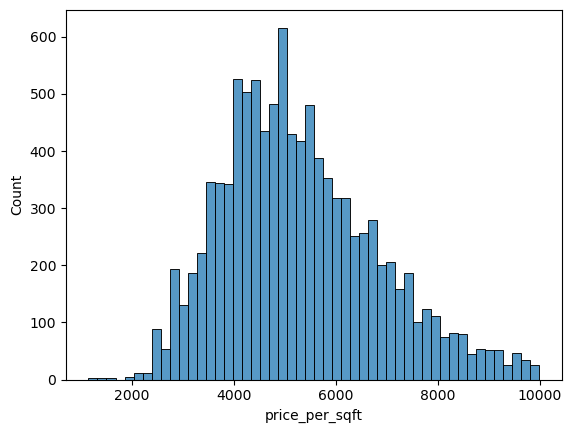

In [664]:
sns.histplot(df8['price_per_sqft'],bins=50)

In [665]:
df9 = df8[df8['total_sqft']/df8['bhk'] > 300]

In [666]:
df9.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,9975.000000,9975.000000,9975.000000,9975.000000,9975.000000
mean,1459.425065,2.403810,79.862342,2.525013,5258.003501
std,826.005456,0.888819,60.725935,0.858877,1493.252535
min,340.000000,1.000000,10.000000,1.000000,1150.172117
25%,1100.000000,2.000000,47.625000,2.000000,4170.963682
50%,1269.000000,2.000000,65.000000,2.000000,5038.487973
75%,1600.000000,3.000000,92.000000,3.000000,6183.217028
max,30400.000000,16.000000,2100.000000,16.000000,9986.394558


In [667]:
df8.head(3)

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
4,Plot Area,1st Block Jayanagar,930.0,4.0,85.0,7.0,9139.784946
10,Super built-up Area,1st Phase JP Nagar,2825.0,4.0,250.0,4.0,8849.557522
11,Super built-up Area,1st Phase JP Nagar,1875.0,3.0,167.0,3.0,8906.666667


In [668]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [669]:
area_order = {
    'Plot  Area': 0,
    'Super built-up  Area': 1,
    'Built-up  Area': 2,
    'Carpet  Area': 3
}
df8['area_type_encoded'] = df8['area_type'].map(area_order)

C:\Users\vighn\AppData\Local\Temp\ipykernel_16296\2041501776.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['area_type_encoded'] = df8['area_type'].map(area_order)


In [670]:
dummies=pd.get_dummies(df8['location'])

In [671]:
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11334,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11336,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11337,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11338,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## Encoding categorical Features

In [672]:
df10=df9.copy()
df10.head(3)

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
10,Super built-up Area,1st Phase JP Nagar,2825.0,4.0,250.0,4.0,8849.557522
11,Super built-up Area,1st Phase JP Nagar,1875.0,3.0,167.0,3.0,8906.666667
14,Super built-up Area,1st Phase JP Nagar,2024.0,3.0,157.0,3.0,7756.916996


In [673]:
# Label Encoding
area_order = {
    'Plot  Area': 0,
    'Super built-up  Area': 1,
    'Built-up  Area': 2,
    'Carpet  Area': 3
}
df10['area_type_encoded'] = df10['area_type'].map(area_order)

In [674]:
# One hot Encoding
dummies=pd.get_dummies(df10.location)

In [675]:
dummies1=dummies.astype({col: int for col in dummies.select_dtypes('bool').columns})

In [676]:
df11=pd.concat([df10,dummies1.drop('others',axis=1)],axis=1)

In [677]:
df11.head(3)

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft,area_type_encoded,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
10,Super built-up Area,1st Phase JP Nagar,2825.0,4.0,250.0,4.0,8849.557522,1,1,0,...,0,0,0,0,0,0,0,0,0,0
11,Super built-up Area,1st Phase JP Nagar,1875.0,3.0,167.0,3.0,8906.666667,1,1,0,...,0,0,0,0,0,0,0,0,0,0
14,Super built-up Area,1st Phase JP Nagar,2024.0,3.0,157.0,3.0,7756.916996,1,1,0,...,0,0,0,0,0,0,0,0,0,0


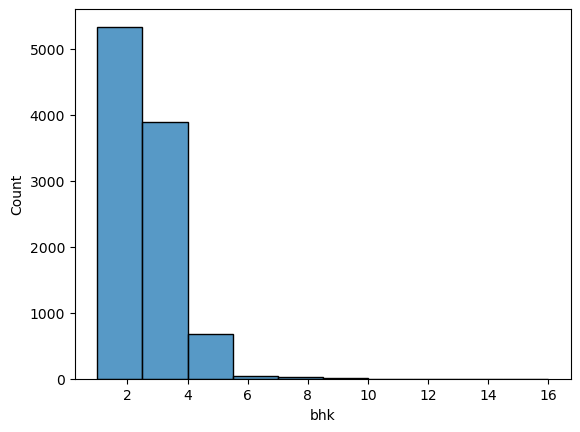

In [678]:
sns.histplot(df11.bhk,bins=10);

In [679]:
df12=df11.drop(['area_type','location','price_per_sqft'],axis=1)
df12.tail(3)

,total_sqft,bath,price,bhk,area_type_encoded,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
11337,812.0,1.0,26.00,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11338,1440.0,2.0,63.93,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11339,1075.0,2.0,48.00,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Training

In [680]:
df12.isna().sum()

total_sqft            0
bath                  0
price                 0
bhk                   0
area_type_encoded     0
                     ..
Yelachenahalli        0
Yelahanka             0
Yelahanka New Town    0
Yelenahalli           0
Yeshwanthpur          0
Length: 240, dtype: int64

In [681]:
X=df12.drop(['price'],axis=1)
X

,total_sqft,bath,bhk,area_type_encoded,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
10,2825.0,4.0,4.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1875.0,3.0,3.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,2024.0,3.0,3.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,1394.0,2.0,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,1077.0,2.0,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11334,1256.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11336,1353.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11337,812.0,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11338,1440.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [682]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [683]:
y=df12['price']
y

10       250.00
11       167.00
14       157.00
16       100.00
17        93.00
          ...  
11334     65.00
11336    110.00
11337     26.00
11338     63.93
11339     48.00
Name: price, Length: 9975, dtype: float64

In [684]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [685]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [686]:
x_train.shape,y_train.shape

((7980, 239), (7980,))

In [687]:
x_test.shape,y_test.shape

((1995, 239), (1995,))

In [688]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8273242484199267

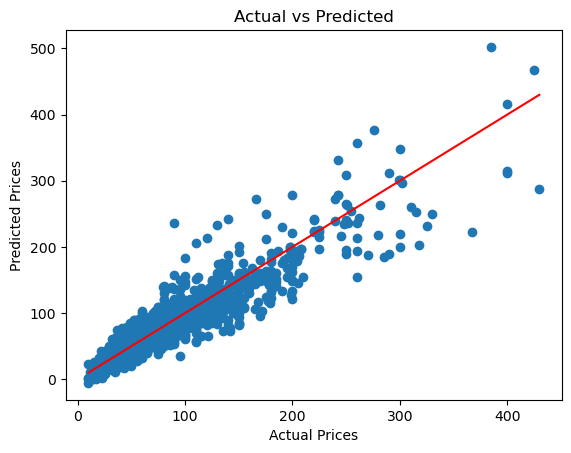

In [689]:
y_pred=model.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()


In [690]:
import pickle

In [691]:
with open('model.pkl','wb') as f:
    pickle.dump(model,f)
    

In [692]:
with open('model.pkl','rb') as f:
    mp=pickle.load(f)

In [693]:
mp.predict(x_test)

array([148.92362416,  32.54887592,  65.10559603, ...,  78.21817202,
        65.51460833,  60.57522115])

In [694]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=7,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.83841311, 0.90280337, 0.77551463, 0.81069674, 0.83126769,
       0.82225805, 0.83359211])

In [695]:
X.columns

Index(['total_sqft', 'bath', 'bhk', 'area_type_encoded', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=239)

In [696]:
np.where(X.columns=='Vittasandra')[0][0]

232

In [697]:
def predict_price(location,sqft,bath,bhk,area_type):
    area_order = {
    'Plot  Area': 0,
    'Super built-up  Area': 1,
    'Built-up  Area': 2,
    'Carpet  Area': 3
    }
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    x[3]=area_order[area_type]
    if loc_index>=0:
        x[loc_index]=1
    return mp.predict([x])[0]
    

In [698]:
predict_price('Vijayanagar',1019.0,2.0,2.0,'Plot  Area')

C:\Users\vighn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.98987503653285

In [699]:
import json
columns = {
    'data_columns' : [col for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))